In [1]:
import matplotlib.pyplot as plt
import os
import numpy as np

In [2]:
def get_times(min_proc, max_proc, file_name, repeats = 10):
    os.system('mpicc ' + file_name)
    times = np.zeros(max_proc-min_proc+1)
    for _ in range(repeats):
        for i in range(min_proc, max_proc + 1):
            times[i - min_proc] += (float(os.popen(f'mpirun -n {i} ./a.out').read()))
    return times/repeats

In [5]:
min_proc = 1
max_proc = 6
send_times = get_times(min_proc, max_proc, 'send.c', repeats=10)
bcast_times = get_times(min_proc, max_proc, 'bcast.c', repeats=10)

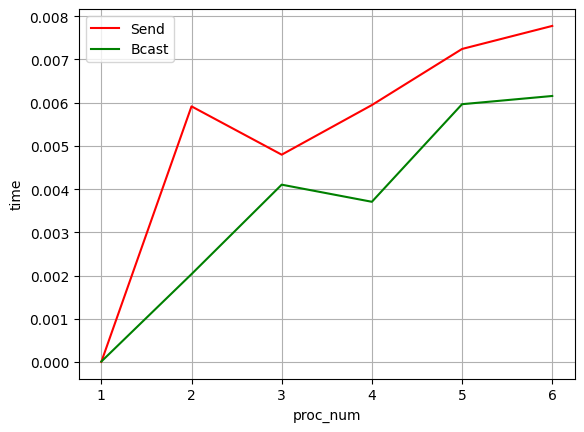

In [6]:
plt.plot(np.arange(min_proc, max_proc+1), send_times, label='Send', color = 'red')
plt.plot(np.arange(min_proc, max_proc+1), bcast_times, label='Bcast', color = 'green')
plt.xlabel('proc_num')
plt.ylabel('time')
plt.legend()
plt.grid()